# Exploratory Data Analysis

### Imports

In [2]:
import matplotlib
import pandas as pd
import re

### Loading Data

#### Let's take a look at the small dataset

In [6]:
!ls ../data/ml-latest-small

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [7]:
links = pd.read_csv('../data/ml-latest-small/links.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
tags = pd.read_csv('../data/ml-latest-small/tags.csv')

In [8]:
print(f"""We have the following shapes:
        Links: {links.shape}
        movies: {movies.shape}
        ratings: {ratings.shape}
        tags: {tags.shape}""")

We have the following shapes:
        Links: (9742, 3)
        movies: (9742, 3)
        ratings: (100836, 4)
        tags: (3683, 4)


#### Links

In [9]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


`links.csv` gives us a mapping of `movieId` with the ids from external sources (IMDB, TMDB)

#### Movies

In [10]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


Since the year of release comes indicated in the title, we will extract that info to another column in case it can help us in the future

In [11]:
def extract_date(title:str) -> int:
    title = ' '.join(title.split())
    if re.match(r'.*\([0-9]{4}\)$', title):
        try:
            return int(title[-5:-1])
        except:
            pass
    return 0

In [12]:
movies['release_year'] = movies.title.apply(lambda film: extract_date(film))

In [13]:
movies.head(2)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995


Let's check if we have any film without `release_year`

In [20]:
print(f"There're {len(movies.query('release_year==0'))} films without year")

There're 13 films without year


<AxesSubplot:ylabel='Frequency'>

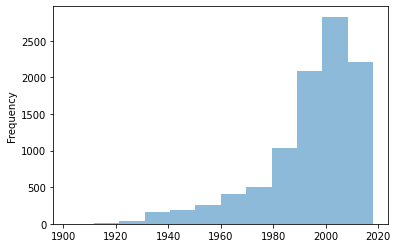

In [22]:
movies.loc[movies.release_year>0].release_year.plot.hist(bins=12, alpha=0.5)

Let's take a look at the genres

In [23]:
def parse_genres(genres_str: str) -> list:
    genres = genres_str.split('|')
    return genres

In [24]:
movies['genres'] = movies.genres.apply(lambda genres_str: parse_genres(genres_str))

In [25]:
movies.head(2)

,movieId,title,genres,release_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995


In [21]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [24]:
len(ratings.movieId.unique())

9724

In [35]:
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [25]:
len(tags.movieId.unique())

1572

In [27]:
len([a for a in tags.movieId.values if not a in movies.movieId.values])

0